In [13]:
from selenium import webdriver
import time, os
from selenium.webdriver.common.keys import Keys
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import datetime
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pandas_profiling import ProfileReport

In [14]:
import matplotlib
matplotlib.use("template")
from matplotlib import pyplot as plt
%matplotlib inline

## Get HTML page through Chrome Driver using Selenium

In [16]:
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.get('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130606&end=20210916')
time.sleep(10)

## Make a beautiful Soup out of the HTML page.

Note: before below cell was executed, I scrolled down in the web page that the above cell generated so that driver.page_source returns all the available executed web page script not only what is shown initially

In [17]:
driver.page_source[:1000]
soup = BeautifulSoup(driver.page_source, 'lxml')
table=soup.find('table')
rows=table.find_all("tr")
rows=rows[1:] #to delete first row that has headers
rows[0]

<tr><td style="text-align: left;">Sep 16, 2021</td><td>$48,158.91</td><td>$48,486.83</td><td>$47,079.56</td><td>$47,783.36</td><td>$31,764,293,754</td><td style="text-align: right;">$899,179,151,780</td></tr>

### Getting  data of each row in the table and save it in a dictionary

In [18]:
data_dict={}
    
for row in rows:
    data_per_row=row.find_all("td")
    date=data_per_row[0].text.strip()
    open_price=data_per_row[1].text.strip()
    highest_price=data_per_row[2].text.strip()
    lowest_price=data_per_row[3].text.strip()
    close_price=data_per_row[4].text.strip()
    volume=data_per_row[5].text.strip()
    market_cap=data_per_row[6].text.strip()

    data_dict[date]=[date,open_price,highest_price,lowest_price,close_price,volume,market_cap]

### Convert Dictionary to Data Frame

In [19]:
Bitcoin_df=pd.DataFrame(data_dict).T
Bitcoin_df.columns=['Date','Open_Price','Highest_Price','Lowest_Price','Close_Price','Volume','Market_Cap']
Bitcoin_df.reset_index(drop=True,inplace=True)

In [20]:
Bitcoin_df.tail(3)

Date Open_Price Highest_Price Lowest_Price Close_Price Volume  \
3061  Apr 30, 2013    $144.00       $146.93      $134.05     $139.00     $0   
3062  Apr 29, 2013    $134.44       $147.49      $134.00     $144.54     $0   
3063  Apr 28, 2013    $135.30       $135.98      $132.10     $134.21     $0   

          Market_Cap  
3061  $1,542,813,125  
3062  $1,603,768,865  
3063  $1,488,566,728

In [21]:
Bitcoin_df.head(7)

Date  Open_Price Highest_Price Lowest_Price Close_Price  \
0  Sep 16, 2021  $48,158.91    $48,486.83   $47,079.56  $47,783.36   
1  Sep 15, 2021  $47,098.00    $48,450.47   $46,773.33  $48,176.35   
2  Sep 14, 2021  $44,960.05    $47,218.13   $44,752.33  $47,092.49   
3  Sep 13, 2021  $46,057.22    $46,598.68   $43,591.32  $44,963.07   
4  Sep 12, 2021  $45,206.63    $46,364.88   $44,790.46  $46,063.27   
5  Sep 11, 2021  $44,869.84    $45,969.29   $44,818.27  $45,201.46   
6  Sep 10, 2021  $46,396.66    $47,031.74   $44,344.49  $44,883.91   

            Volume        Market_Cap  
0  $31,764,293,754  $899,179,151,780  
1  $30,484,496,466  $906,532,479,371  
2  $38,652,152,880  $886,095,283,701  
3  $40,969,943,253  $845,980,481,365  
4  $27,881,980,161  $866,636,671,662  
5  $34,499,835,245  $850,381,828,071  
6  $39,154,666,597  $844,367,023,727

In [22]:
type(Bitcoin_df['Date'])

pandas.core.series.Series

### Convert Datatype of date

In [23]:
Bitcoin_df['Date']=pd.to_datetime(Bitcoin_df['Date'])
Bitcoin_df.head(7)

Date  Open_Price Highest_Price Lowest_Price Close_Price  \
0 2021-09-16  $48,158.91    $48,486.83   $47,079.56  $47,783.36   
1 2021-09-15  $47,098.00    $48,450.47   $46,773.33  $48,176.35   
2 2021-09-14  $44,960.05    $47,218.13   $44,752.33  $47,092.49   
3 2021-09-13  $46,057.22    $46,598.68   $43,591.32  $44,963.07   
4 2021-09-12  $45,206.63    $46,364.88   $44,790.46  $46,063.27   
5 2021-09-11  $44,869.84    $45,969.29   $44,818.27  $45,201.46   
6 2021-09-10  $46,396.66    $47,031.74   $44,344.49  $44,883.91   

            Volume        Market_Cap  
0  $31,764,293,754  $899,179,151,780  
1  $30,484,496,466  $906,532,479,371  
2  $38,652,152,880  $886,095,283,701  
3  $40,969,943,253  $845,980,481,365  
4  $27,881,980,161  $866,636,671,662  
5  $34,499,835,245  $850,381,828,071  
6  $39,154,666,597  $844,367,023,727

###  Cleaning Data by removing '$'  and ',' signs

In [24]:
for column in Bitcoin_df.columns:
    print(Bitcoin_df[column].dtype)
    if(Bitcoin_df[column].dtype == 'object'):
        Bitcoin_df[column]=Bitcoin_df[column].str.replace('$','')
        Bitcoin_df[column]=Bitcoin_df[column].str.replace(',','')
        Bitcoin_df[column]=Bitcoin_df[column].astype('float')

datetime64[ns]
object
object
object
object
object
object


<ipython-input-24-08ab49a0226b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  Bitcoin_df[column]=Bitcoin_df[column].str.replace('$','')


## Some initial  EDA

In [25]:
EDA_df=Bitcoin_df[['Volume']]
EDA_df.set_index(Bitcoin_df['Date'],inplace=True)
EDA_df.head(3)

Volume
Date                    
2021-09-16  3.176429e+10
2021-09-15  3.048450e+10
2021-09-14  3.865215e+10

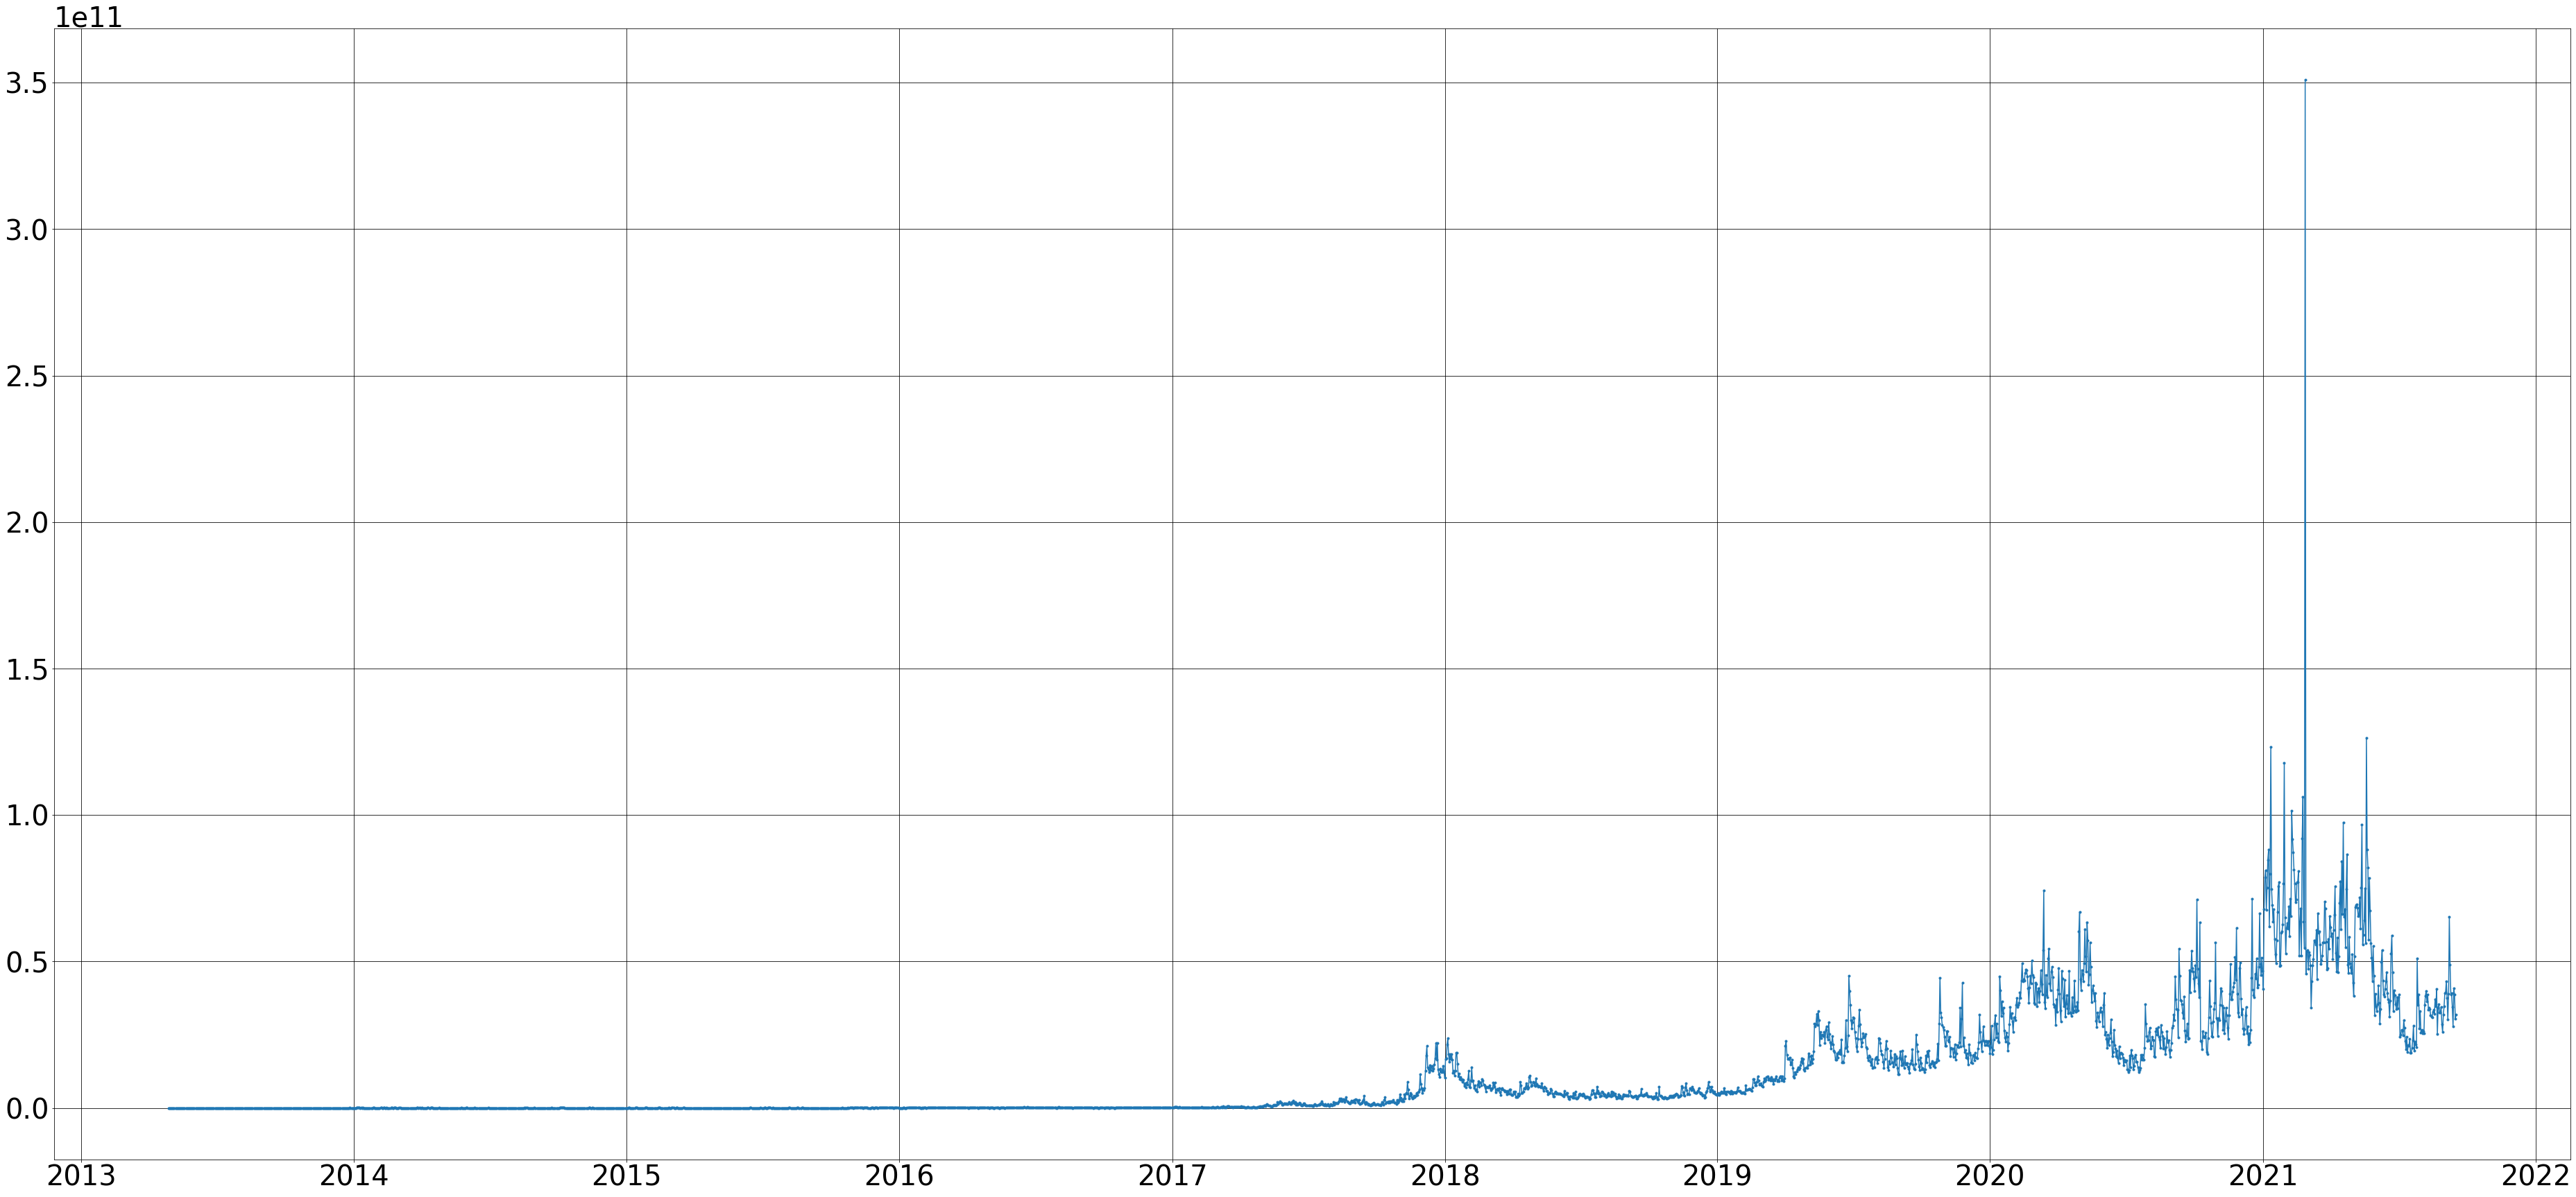

In [26]:
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.figure(figsize = [65,30])
plt.plot(EDA_df,marker='.')
plt.grid(b=True,color='black')

### Let's see one year 

In [27]:
EDA_df=EDA_df.loc[EDA_df.index.year>2020]

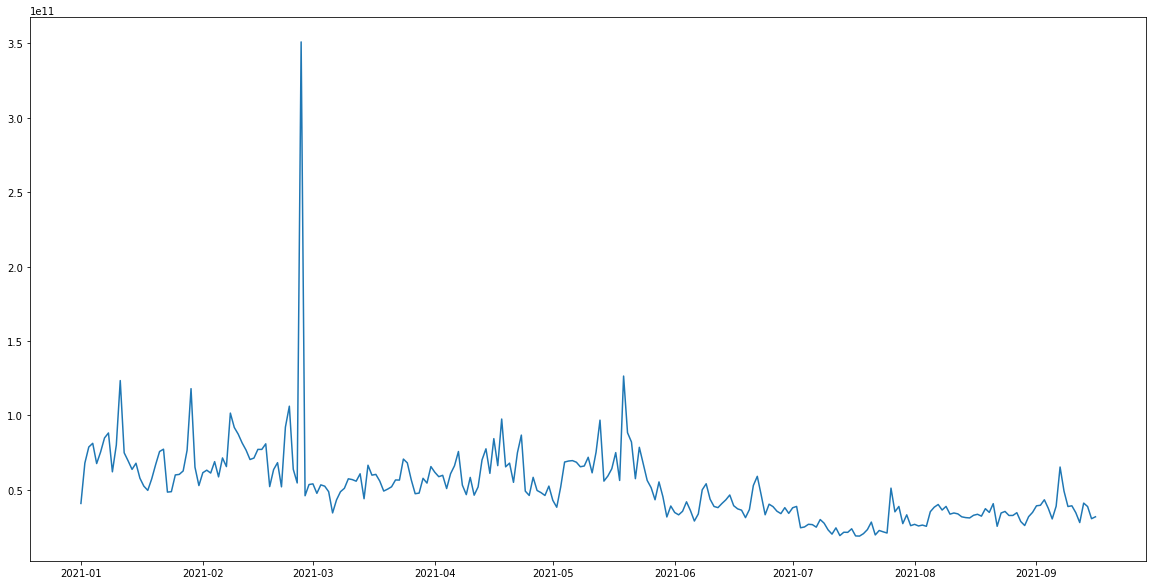

In [28]:
plt.rc('xtick',labelsize=10) 
plt.rc('ytick',labelsize=10) 
plt.figure(figsize = [20,10])
plt.plot(EDA_df)

## Decision: Dropping stock data before 2017 because it will not give important information

In [29]:
Bitcoin_df=Bitcoin_df.loc[Bitcoin_df['Date'] >= '2017-1-1']
Bitcoin_df.tail(3)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  \
1717 2017-01-03     1021.60        1044.08        1021.6      1043.84   
1718 2017-01-02      998.62        1031.39         996.7      1021.75   
1719 2017-01-01      963.66        1003.08         958.7       998.33   

           Volume    Market_Cap  
1717  185168000.0  1.678637e+10  
1718  222184992.0  1.642902e+10  
1719  147775008.0  1.605041e+10

## Read data of daily Bitcoin Transacations taken from: https://data.nasdaq.com/data/BCHAIN/NTRAN-bitcoin-number-of-transactions

In [30]:
Bitcion_transaction=pd.read_csv('BCHAIN-NTRAN.csv')
Bitcion_transaction['Date']=pd.to_datetime(Bitcion_transaction['Date'])
Bitcion_transaction.head(7)

Date     Value
0 2021-09-16  271223.0
1 2021-09-15  268957.0
2 2021-09-14  268127.0
3 2021-09-13  255970.0
4 2021-09-12  192691.0
5 2021-09-11  218445.0
6 2021-09-10  261371.0

### Interesting point..Here is the first ten days of bitcoin starting from 2-1-2009 :)¶

In [31]:
Bitcion_transaction.tail(10)

Date  Value
4631 2009-01-11   95.0
4632 2009-01-10  106.0
4633 2009-01-09   31.0
4634 2009-01-08   14.0
4635 2009-01-07    0.0
4636 2009-01-06    0.0
4637 2009-01-05    0.0
4638 2009-01-04    0.0
4639 2009-01-03    0.0
4640 2009-01-02    1.0

### Merge Bitcoin Historical Prices Data with Daily Transactions Data into one Data Frame

In [32]:
Bitcoin_df=pd.merge(Bitcoin_df,Bitcion_transaction,on='Date')
Bitcoin_df.rename(columns={'Value':'Daily_Transactions'},inplace=True)

In [33]:
Bitcoin_df.head(7)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  \
0 2021-09-16    48158.91       48486.83      47079.56     47783.36   
1 2021-09-15    47098.00       48450.47      46773.33     48176.35   
2 2021-09-14    44960.05       47218.13      44752.33     47092.49   
3 2021-09-13    46057.22       46598.68      43591.32     44963.07   
4 2021-09-12    45206.63       46364.88      44790.46     46063.27   
5 2021-09-11    44869.84       45969.29      44818.27     45201.46   
6 2021-09-10    46396.66       47031.74      44344.49     44883.91   

         Volume    Market_Cap  Daily_Transactions  
0  3.176429e+10  8.991792e+11            271223.0  
1  3.048450e+10  9.065325e+11            268957.0  
2  3.865215e+10  8.860953e+11            268127.0  
3  4.096994e+10  8.459805e+11            255970.0  
4  2.788198e+10  8.666367e+11            192691.0  
5  3.449984e+10  8.503818e+11            218445.0  
6  3.915467e+10  8.443670e+11            261371.0

### Additional Features are taken from https://data.nasdaq.com/data/BCHAIN-blockchain

In [34]:
Bitcoin_more_features=pd.read_csv('Bitcoin_AdditionalFeatures.csv')
Bitcoin_more_features['Date']=Bitcoin_more_features['Date'].str.replace('/','-')
Bitcoin_more_features['Date']=pd.to_datetime(Bitcoin_more_features['Date'], format= '%d-%m-%Y')
Bitcoin_more_features.tail(3)

Date  Miners_Revenue  Difficuly  Cost_Per_Transaction  \
4638 2009-01-04             0.0        0.0                   0.0   
4639 2009-01-03             0.0        0.0                   0.0   
4640 2009-01-02             0.0        1.0                   0.0   

      Average_Block_Size  Total_Bitcoins  \
4638            0.000000            50.0   
4639            0.000000            50.0   
4640            0.000272            50.0   

      Average_Transaction_Confirmation_time  
4638                                    NaN  
4639                                    NaN  
4640                                    NaN

In [35]:
Bitcoin_df=pd.merge(Bitcoin_df,Bitcoin_more_features,on='Date')

In [36]:
Bitcoin_df.tail(3)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  \
1717 2017-01-03     1021.60        1044.08        1021.6      1043.84   
1718 2017-01-02      998.62        1031.39         996.7      1021.75   
1719 2017-01-01      963.66        1003.08         958.7       998.33   

           Volume    Market_Cap  Daily_Transactions  Miners_Revenue  \
1717  185168000.0  1.678637e+10            301664.0    2.141405e+06   
1718  222184992.0  1.642902e+10            290951.0    2.138666e+06   
1719  147775008.0  1.605041e+10            180502.0    1.961203e+06   

         Difficuly  Cost_Per_Transaction  Average_Block_Size  Total_Bitcoins  \
1717  3.176884e+11              7.410000            0.900000      16081387.5   
1718  3.176884e+11              7.350606            0.944878      16079337.5   
1719  3.176884e+11             11.210000            0.690000      16077050.0   

      Average_Transaction_Confirmation_time  
1717                               7.933333  
1718                               6.800000  
1719                               6.800000

## Now we have 14 Features and 1720 Records starting from Data (28-4-2013) To (16-09-2021)

### No NANS

In [37]:
Bitcoin_df.isna().sum()

Date                                     0
Open_Price                               0
Highest_Price                            0
Lowest_Price                             0
Close_Price                              0
Volume                                   0
Market_Cap                               0
Daily_Transactions                       0
Miners_Revenue                           0
Difficuly                                0
Cost_Per_Transaction                     0
Average_Block_Size                       0
Total_Bitcoins                           0
Average_Transaction_Confirmation_time    0
dtype: int64

## Target Variable to be predicted is Average_Transaction_Confirmation_time

### Check outlier

<AxesSubplot:xlabel='Average_Transaction_Confirmation_time', ylabel='Count'>

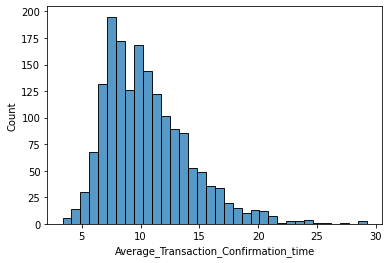

In [38]:
sns.histplot(Bitcoin_df['Average_Transaction_Confirmation_time'])

## Add a new column for date as an integer

In [39]:
def convert_time_to_int(date):
    d=datetime.datetime(date.year,date.month,date.day)
    return calendar.timegm(d.timetuple()) 

In [40]:
Bitcoin_df['Date_As_Int']=Bitcoin_df['Date']
Bitcoin_df['Date_As_Int']=Bitcoin_df['Date_As_Int'].apply(convert_time_to_int)
Bitcoin_df['Date_As_Int'].head(3)

0    1631750400
1    1631664000
2    1631577600
Name: Date_As_Int, dtype: int64

## Add columns for month, year, and day

In [41]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

def get_day(date):
    return date.day

In [42]:
Bitcoin_df['Year']=Bitcoin_df['Date'].apply(get_year)
Bitcoin_df['Month']=Bitcoin_df['Date'].apply(get_month)
Bitcoin_df['Day']=Bitcoin_df['Date'].apply(get_day)

In [43]:
Bitcoin_df.tail(3)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  \
1717 2017-01-03     1021.60        1044.08        1021.6      1043.84   
1718 2017-01-02      998.62        1031.39         996.7      1021.75   
1719 2017-01-01      963.66        1003.08         958.7       998.33   

           Volume    Market_Cap  Daily_Transactions  Miners_Revenue  \
1717  185168000.0  1.678637e+10            301664.0    2.141405e+06   
1718  222184992.0  1.642902e+10            290951.0    2.138666e+06   
1719  147775008.0  1.605041e+10            180502.0    1.961203e+06   

         Difficuly  Cost_Per_Transaction  Average_Block_Size  Total_Bitcoins  \
1717  3.176884e+11              7.410000            0.900000      16081387.5   
1718  3.176884e+11              7.350606            0.944878      16079337.5   
1719  3.176884e+11             11.210000            0.690000      16077050.0   

      Average_Transaction_Confirmation_time  Date_As_Int  Year  Month  Day  
1717                               7.933333   1483401600  2017      1    3  
1718                               6.800000   1483315200  2017      1    2  
1719                               6.800000   1483228800  2017      1    1

In [44]:
Bitcoin_df.corr()

Open_Price  Highest_Price  \
Open_Price                               1.000000       0.999309   
Highest_Price                            0.999309       1.000000   
Lowest_Price                             0.998647       0.998554   
Close_Price                              0.998323       0.999271   
Volume                                   0.712962       0.716491   
Market_Cap                               0.998116       0.998964   
Daily_Transactions                      -0.028706      -0.026262   
Miners_Revenue                           0.920480       0.921646   
Difficuly                                0.701027       0.699686   
Cost_Per_Transaction                     0.906948       0.906736   
Average_Block_Size                       0.484411       0.486715   
Total_Bitcoins                           0.643337       0.641465   
Average_Transaction_Confirmation_time    0.008206       0.008933   
Date_As_Int                              0.707972       0.706287   
Year                                     0.722415       0.721103   
Month                                   -0.081332      -0.083151   
Day                                     -0.012941      -0.012651   

                                       Lowest_Price  Close_Price    Volume  \
Open_Price                                 0.998647     0.998323  0.712962   
Highest_Price                              0.998554     0.999271  0.716491   
Lowest_Price                               1.000000     0.999118  0.704061   
Close_Price                                0.999118     1.000000  0.711074   
Volume                                     0.704061     0.711074  1.000000   
Market_Cap                                 0.999023     0.999766  0.714112   
Daily_Transactions                        -0.028382    -0.025980  0.230845   
Miners_Revenue                             0.919230     0.920484  0.648005   
Difficuly                                  0.702317     0.700741  0.807053   
Cost_Per_Transaction                       0.906130     0.905908  0.550873   
Average_Block_Size                         0.482472     0.485228  0.623966   
Total_Bitcoins                             0.646643     0.643854  0.742151   
Average_Transaction_Confirmation_time      0.004895     0.006980  0.063386   
Date_As_Int                                0.711046     0.708510  0.757700   
Year                                       0.724652     0.722798  0.784701   
Month                                     -0.077161    -0.080491 -0.145622   
Day                                       -0.014690    -0.014195  0.009970   

                                       Market_Cap  Daily_Transactions  \
Open_Price                               0.998116           -0.028706   
Highest_Price                            0.998964           -0.026262   
Lowest_Price                             0.999023           -0.028382   
Close_Price                              0.999766           -0.025980   
Volume                                   0.714112            0.230845   
Market_Cap                               1.000000           -0.024455   
Daily_Transactions                      -0.024455            1.000000   
Miners_Revenue                           0.913733            0.071778   
Difficuly                                0.708122            0.168837   
Cost_Per_Transaction                     0.899559           -0.221855   
Average_Block_Size                       0.489334            0.484439   
Total_Bitcoins                           0.650942            0.199037   
Average_Transaction_Confirmation_time    0.002466           -0.163004   
Date_As_Int                              0.715713            0.167574   
Year                                     0.730212            0.161924   
Month                                   -0.081653            0.027575   
Day                                     -0.014044           -0.043777   

                                       Miners_Revenue  Difficuly  \
Open_Price                

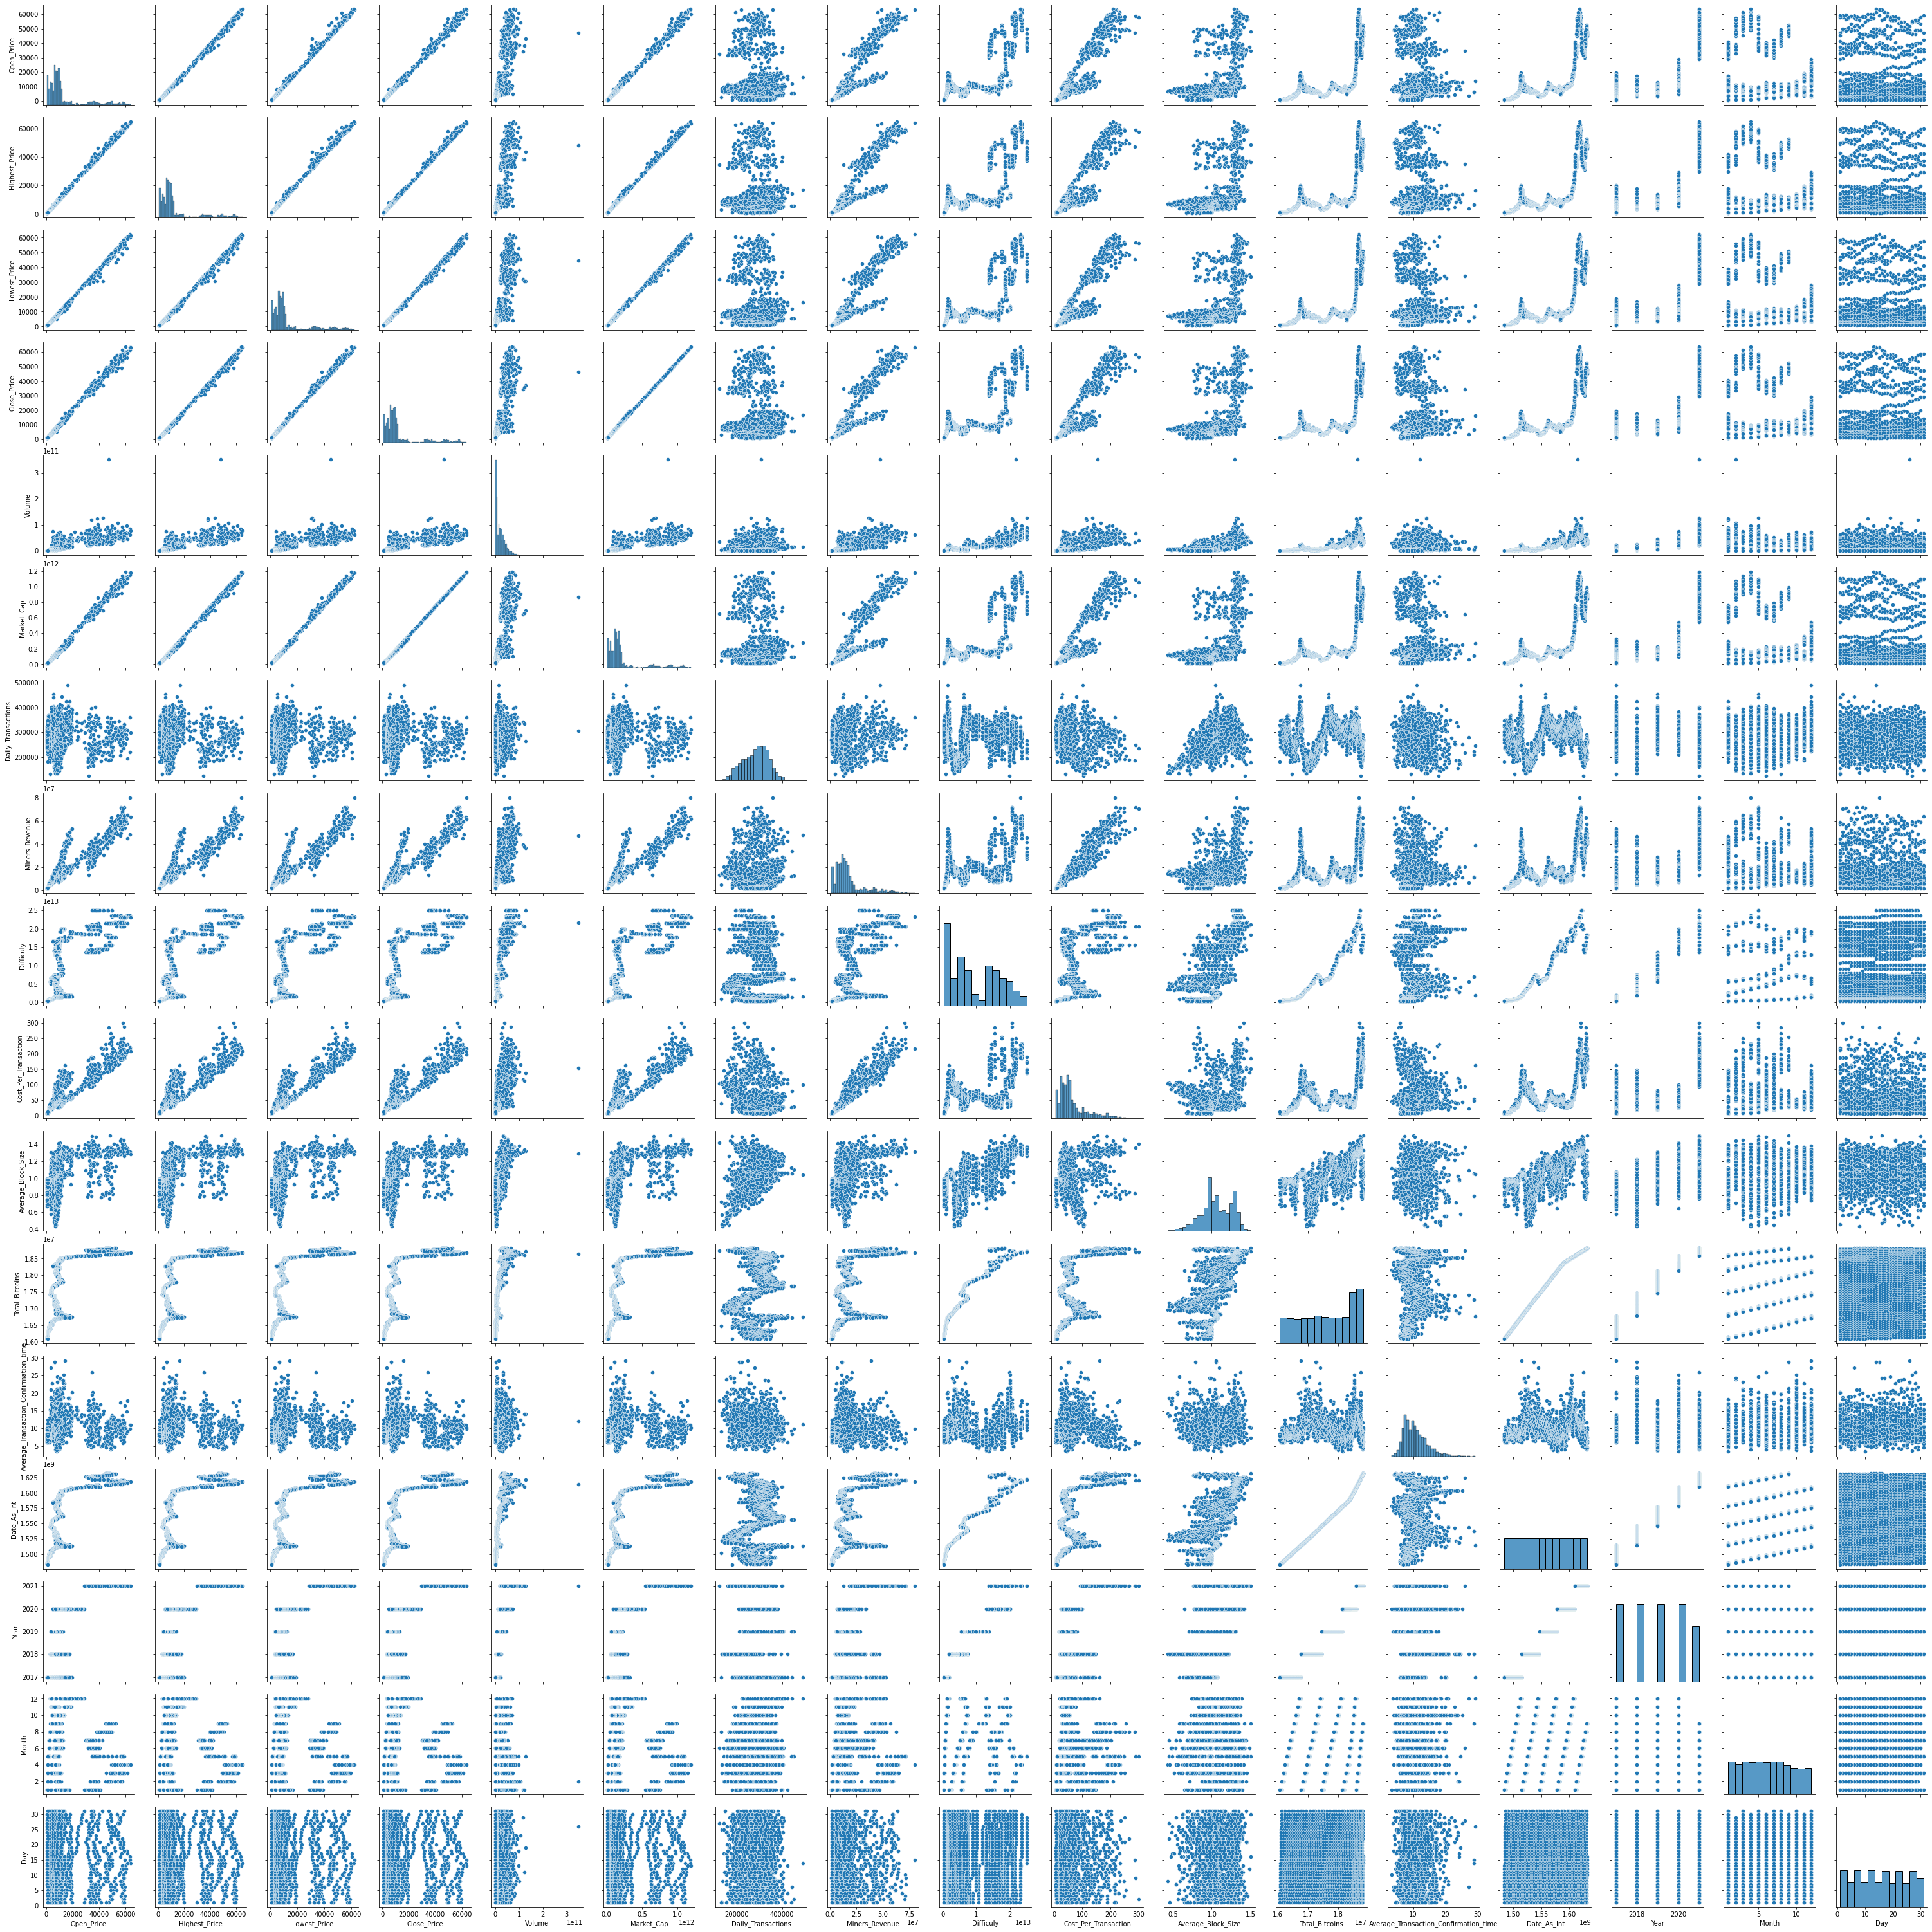

In [45]:
sns.pairplot(Bitcoin_df)

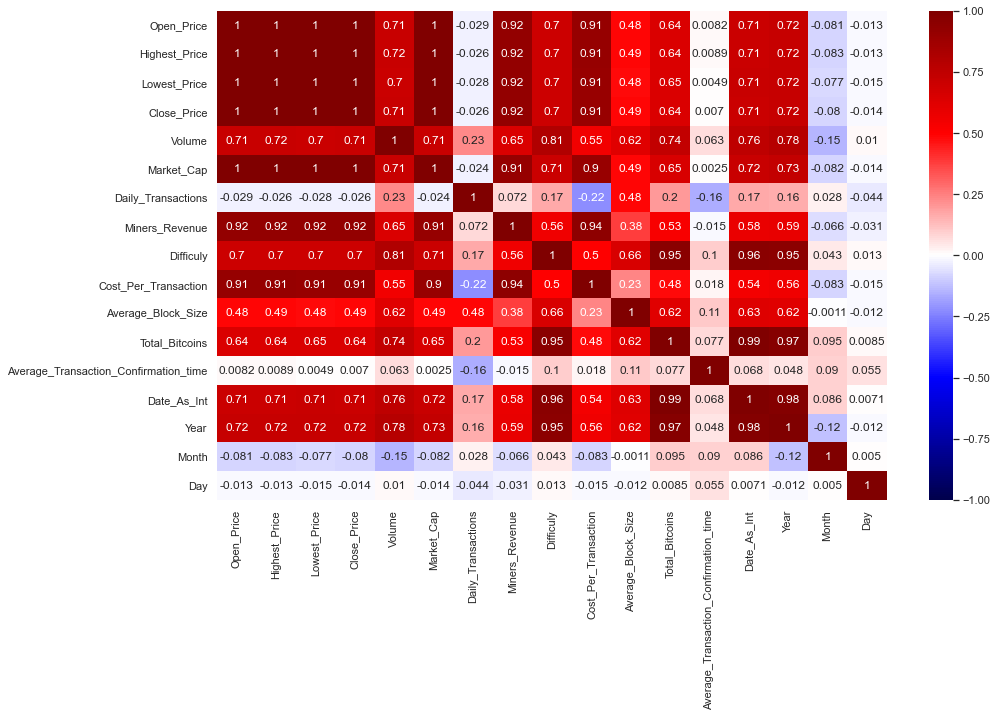

In [46]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(Bitcoin_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

## Pandas Profiling

In [47]:
profile = ProfileReport(Bitcoin_df, title="Pandas Profiling Report",minimal=True)

In [48]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Splitting Data

In [49]:
X=Bitcoin_df.drop(['Average_Transaction_Confirmation_time','Date','Open_Price','Highest_Price','Lowest_Price','Close_Price'],axis=1)
Y=Bitcoin_df['Average_Transaction_Confirmation_time']

train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.4,random_state=10)

In [50]:
train_X

Volume    Market_Cap  Daily_Transactions  Miners_Revenue  \
1379  1.795070e+10  2.994054e+11            374917.0    3.425650e+07   
890   1.550459e+10  9.391844e+10            396501.0    1.033230e+07   
373   3.343093e+10  1.872673e+11            332668.0    1.067617e+07   
20    3.451108e+10  9.222656e+11            256813.0    4.404525e+07   
152   6.613876e+10  1.133882e+12            194580.0    4.502809e+07   
...            ...           ...                 ...             ...   
1393  4.225180e+09  1.342279e+11            352207.0    1.754061e+07   
1344  1.653410e+10  2.251787e+11            337959.0    4.013637e+07   
527   4.424348e+10  1.314093e+11            312770.0    1.573546e+07   
1149  5.845400e+09  1.404830e+11            250208.0    1.866175e+07   
1289  8.797910e+09  1.684797e+11            213978.0    2.115751e+07   

         Difficuly  Cost_Per_Transaction  Average_Block_Size  Total_Bitcoins  \
1379  1.590897e+12             91.370895            1.045256      16725125.0   
890   6.393024e+12             26.058710            1.213675      17637262.5   
373   1.734600e+13             32.092563            1.249473      18483462.5   
20    1.761503e+13            171.507095            1.025526      18799162.5   
152   2.358198e+13            231.411695            1.355659      18684900.0   
...            ...                   ...                 ...             ...   
1393  1.364422e+12             51.558543            1.056894      16697437.5   
1344  1.931136e+12            122.358755            1.057117      16797012.5   
527   1.391252e+13             49.799384            1.137403      18311237.5   
1149  5.178671e+12             75.489214            0.965074      17171050.0   
1289  3.290606e+12             98.794856            1.022322      16906187.5   

      Date_As_Int  Year  Month  Day  
1379   1512604800  2017     12    7  
890    1554854400  2019      4   10  
373    1599523200  2020      9    8  
20     1630022400  2021      8   27  
152    1618617600  2021      4   17  
...           ...   ...    ...  ...  
1393   1511395200  2017     11   23  
1344   1515628800  2018      1   11  
527    1586217600  2020      4    7  
1149   1532476800  2018      7   25  
1289   1520380800  2018      3    7  

[1032 rows x 12 columns]

In [51]:
train_X,val_X,train_y,val_y=train_test_split(train_X,train_y,test_size=0.2,random_state=19)

## Baseline Model

In [52]:
lm=LinearRegression()

# Fit the model to the full dataset
lm.fit(train_X, train_y)

# Print out the R^2 for the model against the full dataset
print('training score ',lm.score(train_X,train_y))
print('testing score ',lm.score(val_X,val_y))

training score  0.13170621724214782
testing score  0.11889922967569089


In [53]:
 ## Experiment 2: Scale 
scaler=StandardScaler()

# Fit the model to the full dataset


train_X_scaled=scaler.fit_transform(train_X)
val_X_Scaled=scaler.transform(val_X)



lm=LinearRegression()

# Fit the model to the full dataset
lm.fit(train_X_scaled, train_y)


# Print out the R^2 for the model against the full dataset
print('training score ',lm.score(train_X_scaled,train_y))
print('testing score ',lm.score(val_X_Scaled,val_y))

training score  0.13170621724226994
testing score  0.1188992296263327


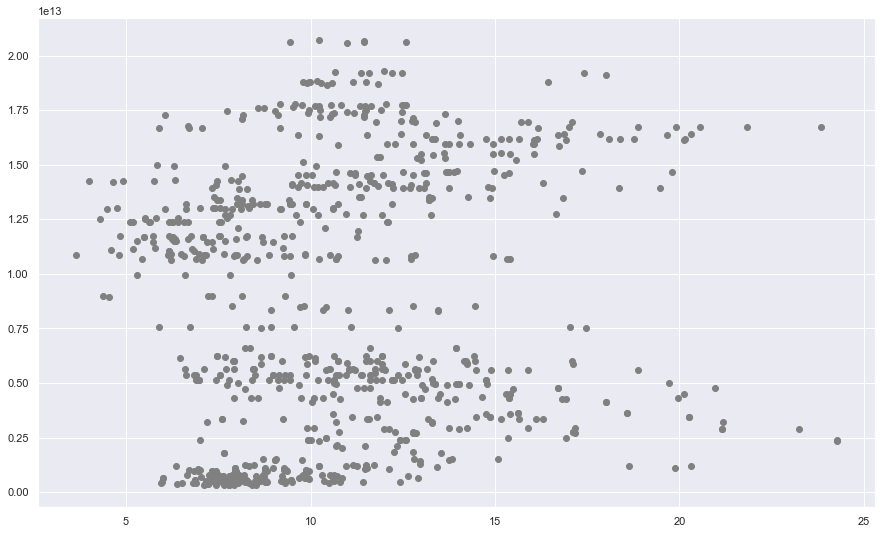

In [54]:
plt.scatter(train_y, lm.predict(train_X), color='grey')
plt.show()

### Trying polynomials

In [55]:
# Experiment 3
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.4733274745817183
testing score  0.35219298385656006


In [56]:
# Experiment 4

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.5232218542076996
testing score  0.38089371581020404


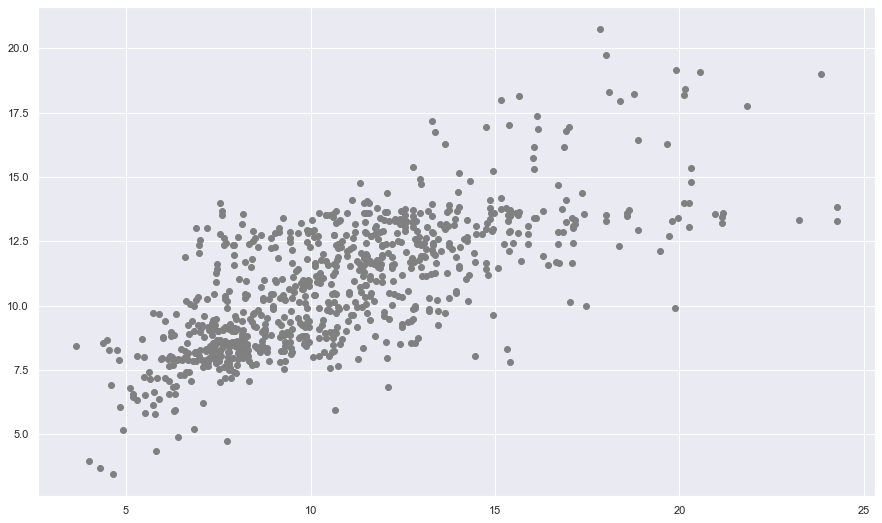

In [57]:
plt.scatter(train_y, pol_reg.predict(X_poly), color='grey')
plt.show()

In [58]:
# Experiment 5


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.5298896385561644
testing score  0.3708794551569605


In [59]:
# Experiment 6
from sklearn import preprocessing

train_X=preprocessing.normalize(train_X)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))


training score  0.5095094360181811
testing score  -5.393396726527509e+105


## Conclusion: Experiment 4 had highest accuracy in predicting unseen data